### TES when there is seasonality in dataset aprt from level and trend. Datasets which show a similar set of pattern after fixed intervals of a time period have seasonality. 


In [1]:
#Hyperparameters:

# Alpha: Smoothing factor for the level.
# Beta: Smoothing factor for the trend.
# Gamma: Smoothing factor for the seasonality.
# Trend Type: Additive or multiplicative.
# Dampen Type: Additive or multiplicative.
# Phi: Damping coefficient.
# Seasonality Type: Additive or multiplicative.
# Period: Time steps in seasonal period.

In [2]:
import numpy as np
from pandas import read_excel
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import os

In [3]:
os.chdir("C:\\Users\\satish\\Desktop")

In [4]:
series = read_excel("TSF_data.xlsx", sheet_name = "TES")


In [5]:
series.describe()

,CO2
count,348.000000
mean,330.123879
std,10.059747
min,313.550000
25%,321.302500
50%,328.820000
75%,338.002500
max,351.340000


In [6]:
train = series.iloc[0:200]
test = series.iloc[200:]
y_hat = test.copy()


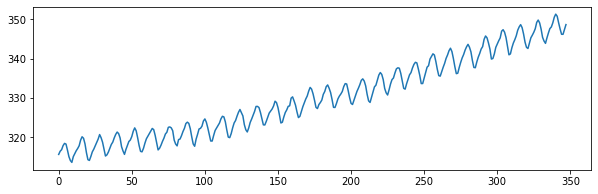

In [7]:

# plot the full series
plt.figure(figsize=(10,3))
plt.plot(series['CO2'], label='series')
plt.show()


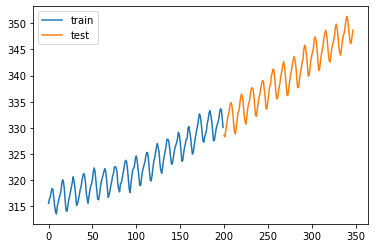

In [8]:
# plot the splits as train and test
plt.plot(train['CO2'], label='train')
plt.plot(test['CO2'], label='test')
plt.legend(loc='best')
plt.show()


In [9]:
# Using Holts winter method in ExponentialSmoothing library
model = ExponentialSmoothing(np.asarray(train['CO2']), seasonal_periods = 4, trend = 'add', seasonal = 'mul')
fit3 = model.fit(smoothing_level = 0.0526, smoothing_slope = 0.455, smoothing_seasonal = 0.261, optimized=False)
y_hat['TES_add_mul'] = fit3.forecast(len(test))
y_hat


C:\Users\satish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-9-fce1fb5d0c5c>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit3 = model.fit(smoothing_level = 0.0526, smoothing_slope = 0.455, smoothing_seasonal = 0.261, optimized=False)


,Date,CO2,TES_add_mul
200,1975-09-30,328.59,331.859249
201,1975-10-31,328.31,331.990641
202,1975-11-30,329.44,331.859368
203,1975-12-31,330.64,332.226394
204,1976-01-31,331.62,332.376279
...,...,...,...
343,1987-08-31,347.54,350.321327
344,1987-09-30,346.20,350.472335
345,1987-10-31,346.20,350.603847
346,1987-11-30,347.44,350.457973


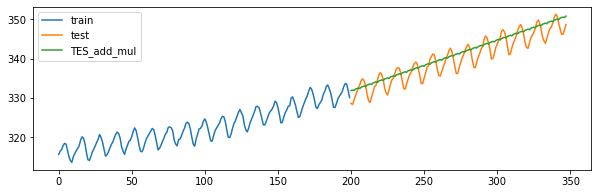

In [10]:
plt.figure(figsize=(10,3))
plt.plot(train['CO2'], label='train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat['TES_add_mul'], label = 'TES_add_mul')
plt.legend(loc = 'best')
plt.show()


In [11]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rmse = sqrt(mean_squared_error(test.CO2, y_hat['TES_add_mul']))
print(rmse)


2.479628869517952


<ipython-input-12-fcde5170ec24>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sm.tsa.seasonal_decompose(train.CO2, model = 'add', freq=4).plot()


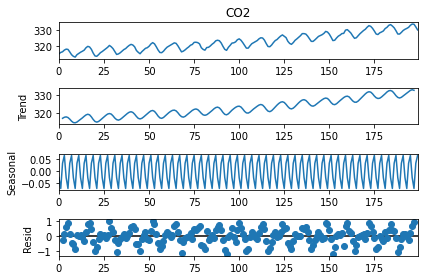

In [12]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.CO2, model = 'add', freq=4).plot()
plt.show()


In [13]:
# additive seasonality model
# corresponds to real-statistics worksheet "Holt Winters 5"
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['CO2']), seasonal_periods=4, trend='add', seasonal='add')
fit1 = model.fit(smoothing_level=0.015532, smoothing_slope=1, smoothing_seasonal=0.23088, optimized=False)
y_hat['TES_add'] = fit1.forecast(len(test))
y_hat
rmse=sqrt(mean_squared_error(test.CO2, y_hat['TES_add']))
print(rmse)


5.163290582263275


C:\Users\satish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-13-bec17eafdb6c>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = model.fit(smoothing_level=0.015532, smoothing_slope=1, smoothing_seasonal=0.23088, optimized=False)


### We have tried TES for both additive and multiplicative seasonality and can see that the multiplicative model gives better accuracy than the additive model